In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

pd.set_option('display.max_columns', 100)

In [2]:
df_all = pd.read_csv('311_all_features.csv', parse_dates = ['Date', 'closed_date', 'open_day'])
df_all.head()

,Date,Time,status,closed_date,days_open,reason,subject,title,object_id,x_coord,y_coord,x_geom,y_geom,opened_year,opened_month,open_day,open_time,closed_year,closed_month,max_temp,min_temp,precipitation,snow,snow_depth,geometry,hood
0,2016-01-01,00:10:35,0,2016-01-02 12:03:41,2.0,Traffic Control,Vehicles and Commuting,Abandoned Vehicle - Open311,2196,-1.038160e+07,5.613667e+06,-93.259481,44.950087,2016,1,2016-01-01,00:10:35,2016.0,1.0,30,15,0.005,0.005,4.0,POINT (-93.25948128957221 44.95008652484643),Midtown Phillips
1,2016-01-01,07:50:34,0,2016-01-02 09:08:54,2.0,Traffic Control,Vehicles and Commuting,Parking Violation - Open311,29550,-1.038520e+07,5.616158e+06,-93.291802,44.965918,2016,1,2016-01-01,07:50:34,2016.0,1.0,30,15,0.005,0.005,4.0,POINT (-93.29180214798036 44.96591844428954),Lowry Hill
2,2016-01-01,08:46:35,0,2016-02-08 11:28:20,39.0,Snow & Ice,Sidewalks,Sidewalk Snow and Ice - SS,19633,-1.037889e+07,5.625311e+06,-93.235196,45.024063,2016,1,2016-01-01,08:46:35,2016.0,2.0,30,15,0.005,0.005,4.0,POINT (-93.23519639048814 45.02406342616249),Waite Park
3,2016-01-01,09:35:17,0,2016-01-04 09:30:00,3.0,Traffic Control,Vehicles and Commuting,Parking Violation Complaint,19634,-1.038501e+07,5.604598e+06,-93.290172,44.892400,2016,1,2016-01-01,09:35:17,2016.0,1.0,30,15,0.005,0.005,4.0,POINT (-93.29017159704357 44.8923999506875),Windom
4,2016-01-01,10:00:34,0,2016-01-02 09:37:55,1.0,Traffic Control,Vehicles and Commuting,Parking Violation - Open311,2197,-1.038350e+07,5.615948e+06,-93.276582,44.964583,2016,1,2016-01-01,10:00:34,2016.0,1.0,30,15,0.005,0.005,4.0,POINT (-93.27658196337543 44.96458340475032),Steven's Square - Loring Heights


In [3]:
df_all.columns

Index(['Date', 'Time', 'status', 'closed_date', 'days_open', 'reason',
       'subject', 'title', 'object_id', 'x_coord', 'y_coord', 'x_geom',
       'y_geom', 'opened_year', 'opened_month', 'open_day', 'open_time',
       'closed_year', 'closed_month', 'max_temp', 'min_temp', 'precipitation',
       'snow', 'snow_depth', 'geometry', 'hood'],
      dtype='object')

In [4]:
df = df_all[['Date', 'Time', 'status', 'title', 'x_geom', 'y_geom', 
       'max_temp', 'min_temp', 'precipitation', 'snow', 'snow_depth', 'hood']]
df.head(2)

,Date,Time,status,title,x_geom,y_geom,max_temp,min_temp,precipitation,snow,snow_depth,hood
0,2016-01-01,00:10:35,0,Abandoned Vehicle - Open311,-93.259481,44.950087,30,15,0.005,0.005,4.0,Midtown Phillips
1,2016-01-01,07:50:34,0,Parking Violation - Open311,-93.291802,44.965918,30,15,0.005,0.005,4.0,Lowry Hill


In [5]:
df_dates_titles = df_all[['Date', 'title']]
X = pd.get_dummies(df_dates_titles)
X = X.groupby(['Date']).sum()
X_dates = X.reset_index()
print(len(X))
X.head()

731


,title_Abandoned Vehicle,title_Abandoned Vehicle - Open311,title_Abandoned/Illegally Parked Bicycle,title_Air Pollution Complaint,title_Animal Complaint - Livability,title_Animal Complaint - Public Health,title_Barricade Pickup / Placement,title_Bicycle Lane Issue,title_Bicycle Trail Improvement Request,title_Bike Lane Issue - Open311,title_Bridge Complaint,title_Campaign Sign Complaint,title_Certificate of Code Compliance Request,title_Certificate of Occupancy Request,title_Chemical Spill,title_Commercial Disability Zone,title_Commercial Food Safety/Sanitation Complaint,title_Commercial Structure Unsound,title_Commercial/Mixed Conditions Complaint,title_Debris in the Street or Alley,title_Emergency Pollution Complaint,title_Exterior Nuisance - Self Service,title_Exterior Nuisance Complaint,title_Fence or Guardrail Maintenance,title_Fire Rig Visit Request,title_Full TISH Report Request,title_General Street Complaint,title_Graffiti - Open311,title_Graffiti complaint / reporting,title_Grass & Weed Complaint,title_Hoarding,title_Homeless Encampment,title_Hydrant Issue,title_Illegal Dumping Complaint,title_Inoperable Vehicle Complaint,title_K9 Appearance Request,title_Land Pollution Complaint,title_Licensing Complaint,title_Neighborhood Parking Information,title_Noise Pollution Complaint,title_Parking Meter - Open311,title_Parking Meter Problem,title_Parking Violation - Open311,title_Parking Violation Complaint,title_Police Mounted Patrol Request,title_Pothole,title_Pothole - Open311,title_RHOD Conditions Complaint,title_RHOD Exterior Nuisance Complaint,title_Repair Notice Question,title_Residential Disability Zone,title_Sewer Issues,title_Sidewalk Obstruction Complaint,title_Sidewalk Snow & Ice Complaint,title_Sidewalk Snow Ice - Open311,title_Sidewalk Snow and Ice - SS,title_Sidewalk Structural - Open311,title_Sidewalk Structural Complaint,title_Sign Complaint,title_Snow & Ice Complaint,title_Snow - Illegal Dumping,title_Solid Waste Overflow Litter,title_Solid Waste Overflowing Litter - Open311,title_Special Sweep,title_Speed Hump Request,title_Speed Wagon,title_Sport Equip in Street,title_Street Light - New,title_Street Light Outage,title_Street Light Outage - Open311,title_Street Light Trouble,title_Street Light Trouble - Open311,title_Street Light Wreck - Open311,title_Street Light Wreck/Damage,title_Streets Snow & Ice - Open311,title_Traffic Sign - New,title_Traffic Sign - Removal,title_Traffic Sign - Repair,title_Traffic Sign Repair - Open311,title_Traffic Signal - New/Modification,title_Traffic Signal Timing - Open311,title_Traffic Signal Timing Issue,title_Traffic Signal Trouble,title_Traffic Signal Trouble - Open311,title_Trees Down,title_Unpermitted Work,title_Unpermitted Work - Self Service,title_Urgent Pollution Complaint,title_Vacant Building / Open to Trespass,title_Vacant Building / Open to Trespass Boarded,title_Water Main Break,title_Water Pollution Complaint
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,7,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-01-02,8,2,0,0,5,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,8,0,0,0,0,0,0,1,0,2,5,18,10,0,0,0,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
2016-01-03,8,0,0,0,2,3,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,1,0,1,0,0,0,8,0,0,0,0,0,0,0,0,1,8,0,15,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-01-04,26,2,0,1,17,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,9,17,0,0,0,0,1,0,0,1,4,0,0,0,0,6,14,0,1,1,0,0,0,2,0,1,33,8,11,0,0,0,13,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2016-01-05,21,1,0,1,10,3,0,0,0,2,0,0,0,0,0,0,2,0,0,2,0,0,9,0,0,0,0,0,5,0,0,0,0,0,0,0,2,1,0,1,0,0,1,15,0,1,1,0,0,0,0,1,0,18,24,9,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,3,2,0,1,1,0,1,0,

In [6]:
y = df_all[['Date', 'days_open']]
y = y.groupby(['Date']).mean()
y_dates = y.reset_index()
print(len(y))
y.head()

731


,days_open
Date,
2016-01-01,15.708333
2016-01-02,9.949367
2016-01-03,12.418182
2016-01-04,13.766304
2016-01-05,8.027027


In [7]:
y = y_dates['days_open']
y.head()

0    15.708333
1     9.949367
2    12.418182
3    13.766304
4     8.027027
Name: days_open, dtype: float64

In [8]:
## Linear Regression ##

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.22897540727374624
Root Mean Squared Error: 4.348356971745173


In [9]:
print('Estimated intercept coefficient: {}'.format(reg_all.intercept_))

Estimated intercept coefficient: 8.899443829353828


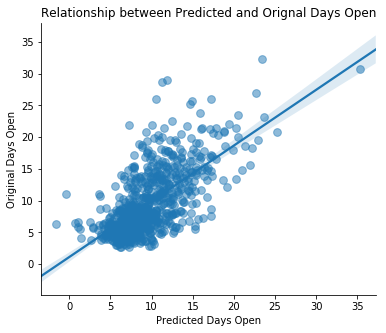

In [10]:
# scatter plot between predicted days_open (reg_all.predict(X)) and actuals
fig, ax = plt.subplots(figsize=(6, 5))
sns.regplot(x=reg_all.predict(X), y=y, fit_reg = True, scatter_kws={'alpha':0.5, 's':60})
#plt.scatter(reg_all.predict(X), y, alpha = .5, s = 50)
plt.xlabel("Predicted Days Open")
plt.ylabel("Original Days Open")
plt.title("Relationship between Predicted and Orignal Days Open")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [11]:
# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv = 5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

[-1.47792855 -6.74163779 -0.66932729 -0.11326038 -0.34580736]
Accuracy: -1.87 (+/- 4.96)


# Adding dates

In [12]:
## Linear Regression ##

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_dates, y, test_size = .3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

TypeError: float() argument must be a string or a number, not 'Timestamp'